In [ ]:
!pip install deepface

In [43]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [73]:
url_img1 = "/content/Winter.jpg"

In [ ]:
# Encontrar rostros relacionados en imágenes

df = DeepFace.find(
    img_path = url_img1,
    db_path = "/content/",
    model_name = "Facenet",
    detector_backend = "retinaface",
    enforce_detection = False
)

In [75]:
df = pd.DataFrame(df[0])

In [76]:
df

,identity,hash,target_x,target_y,target_w,target_h,threshold,source_x,source_y,source_w,source_h,distance,confidence
0,/content/Winter.jpg,f99b7d1884908010657e72b71a1f4d3d275565ec,327,100,352,453,0.4,327,100,352,453,0.003681,100.00
1,/content/Sunoo2.jpg,bb495176fc9495f218fecfeb9d0d56fa555fa267,463,249,494,668,0.4,327,100,352,453,0.273811,69.40
2,/content/Sunoo4.jpg,2b94655caf9e7fb59be2c94c4de06a50f3432634,231,188,376,475,0.4,327,100,352,453,0.349042,55.41
3,/content/Wonyoung2.jpg,8790c8ba9a2f600604c64f05af27bce15cef2295,311,201,490,603,0.4,327,100,352,453,0.360629,53.28


In [77]:
# Analizar propiedades de las imágenes

result = DeepFace.analyze(
    img_path = list(df["identity"]),
    actions = ["emotion", "age", "gender", "race"],
    detector_backend = "retinaface",
    enforce_detection = False
)

Action: race: 100%|██████████| 4/4 [00:00<00:00, 47.85it/s]


In [78]:
emotions = []
ages = []
genders = []
races = []

for image in result:
    for face in image:
        emotions.append(face["dominant_emotion"])
        ages.append(face["age"])
        genders.append(face["dominant_gender"])
        races.append(face["dominant_race"])

In [79]:
emotions

['sad', 'happy', 'happy', 'sad']

In [80]:
ages

[26, 31, 28, 24]

In [81]:
genders

['Woman', 'Man', 'Man', 'Woman']

In [82]:
races

['asian', 'asian', 'asian', 'asian']

In [83]:
# Convertir las imágenes a un array

imgs = []

for i in df["identity"]:
  imgs.append(cv2.imread(i))

imgs

[array([[[49, 55, 54],
         [48, 54, 53],
         [48, 54, 53],
         ...,
         [17, 28, 25],
         [18, 29, 26],
         [19, 30, 27]],
 
        [[49, 55, 54],
         [48, 54, 53],
         [48, 54, 53],
         ...,
         [16, 27, 24],
         [18, 29, 26],
         [19, 30, 27]],
 
        [[49, 55, 54],
         [48, 54, 53],
         [48, 54, 53],
         ...,
         [16, 27, 25],
         [17, 28, 26],
         [17, 28, 26]],
 
        ...,
 
        [[ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4],
         ...,
         [ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4]],
 
        [[ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4],
         ...,
         [ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4]],
 
        [[ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4],
         ...,
         [ 4,  4,  4],
         [ 4,  4,  4],
         [ 4,  4,  4]]], dtype=uint8),
 array([[[148, 163, 189],
         [146, 1

(np.float64(-0.5), np.float64(735.5), np.float64(735.5), np.float64(-0.5))

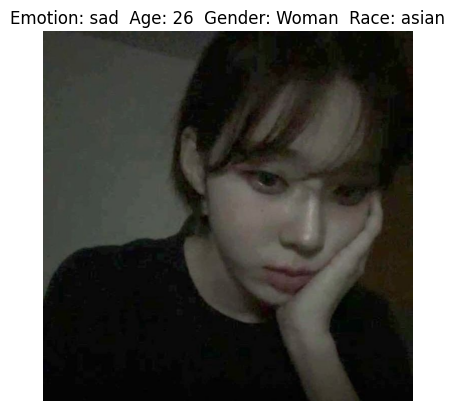

In [88]:
# Convertir BGR → RGB
img = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Emotion: {emotions[0]}  Age: {ages[0]}  Gender: {genders[0]}  Race: {races[0]}")
plt.axis("off")